In [2]:
# from http://flothesof.github.io/k-means-numpy.html

# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

/usr/local/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [165]:
points = []
def init_points():
    global points
    points = np.vstack(((np.random.randn(600, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(400, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(300, 2) * 0.5 + np.array([-0.5, -0.5]))))
    return np.array(points)

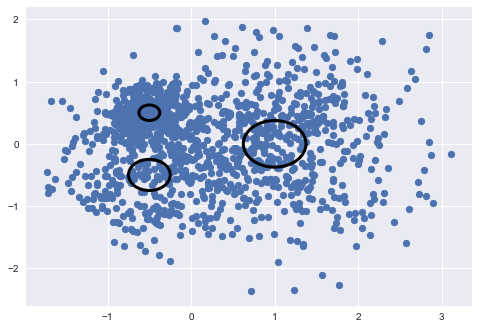

In [47]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [63]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [64]:
initialize_centroids(points, 3)

array([[-0.67900982,  0.09220268],
       [-1.08466512, -0.87414001],
       [-0.57416288,  0.24035463]])

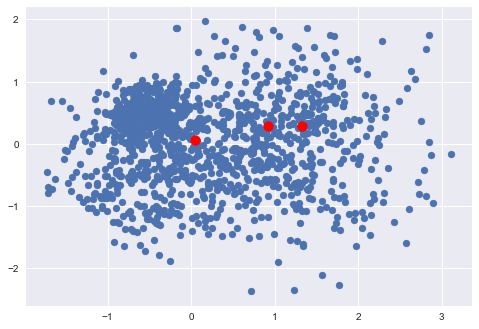

In [65]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [66]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [67]:
c = initialize_centroids(points, 4)
closest_centroid(points, c)

array([2, 1, 2, ..., 3, 3, 0])

In [191]:

def move_centroids(closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    global points
    filtered_centroids = []
    new_centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    for k in range(centroids.shape[0]):
        T = (new_centroids[k] - centroids[k])**2
        max = np.max(np.abs(T))

        epsilon = 0.002
        last_centroid = (k == centroids.shape[0] - 1 and len(filtered_centroids) == 0)
        if max > epsilon or last_centroid:
            filtered_centroids.append(new_centroids[k])
        else:
            points = points[closest!=k]
            closest = closest[closest!=k]
            
            
    return np.array(filtered_centroids)

In [158]:
c = move_centroids(closest_centroid(points, c), c)

In [184]:
init_points()
centroids = initialize_centroids(points, 3)

[[ 0.53146403 -0.93618429]
 [ 1.3228264   0.29534976]]
points.shape[0] : 599
closest.shape[0] : 599
[[ 1.34601366  0.2874247 ]]


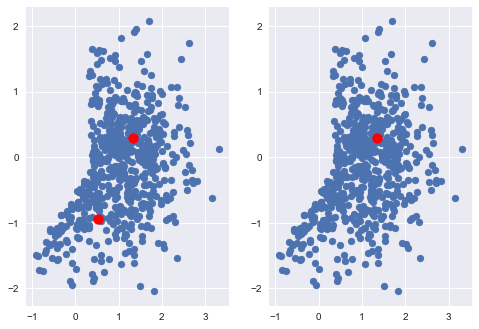

In [188]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(closest, centroids)
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)


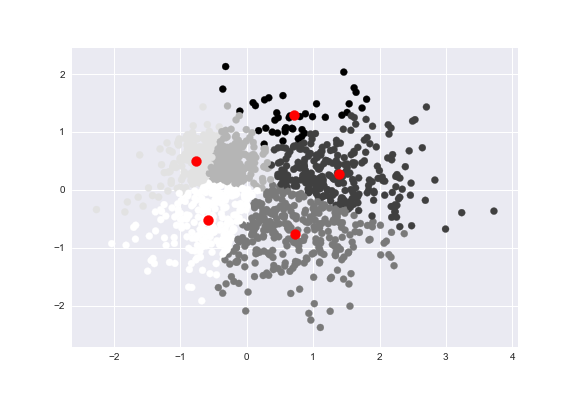
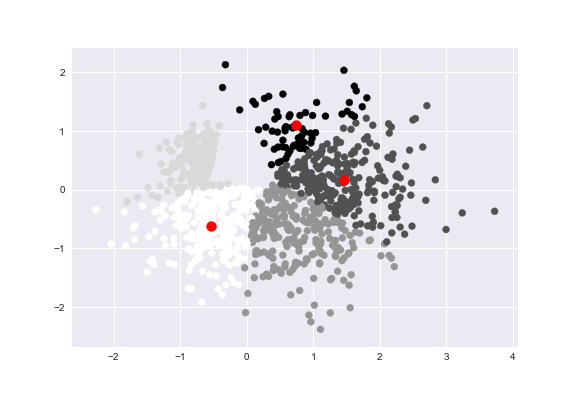
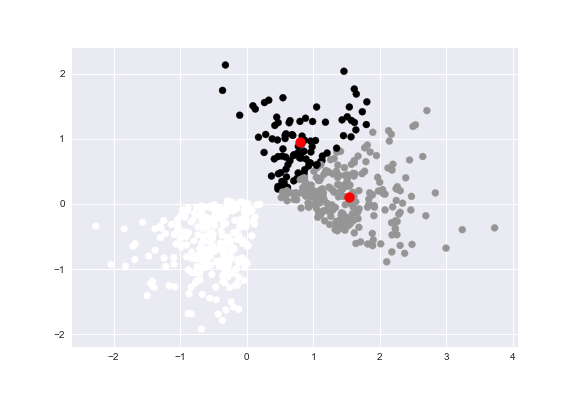
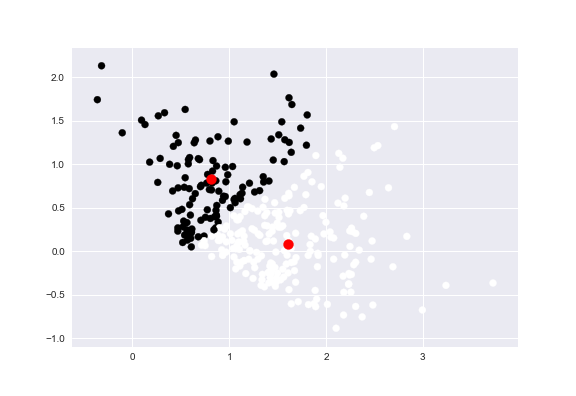
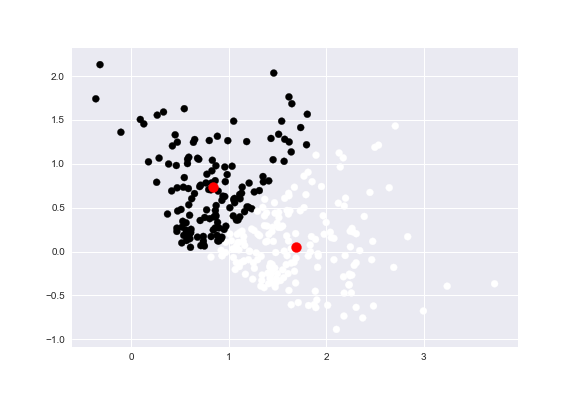
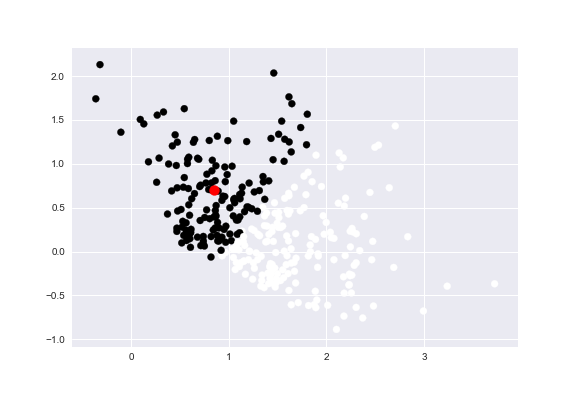
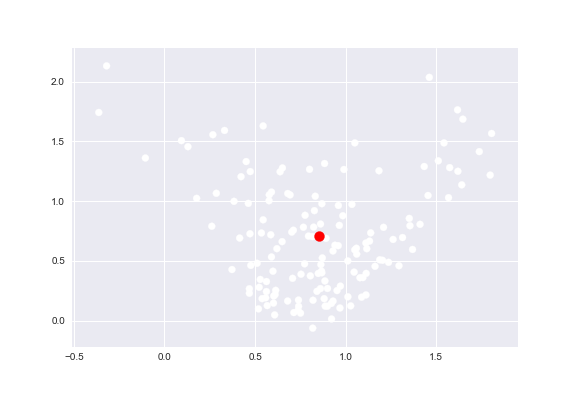
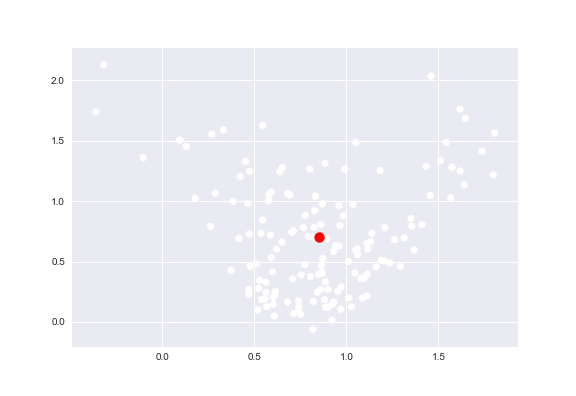
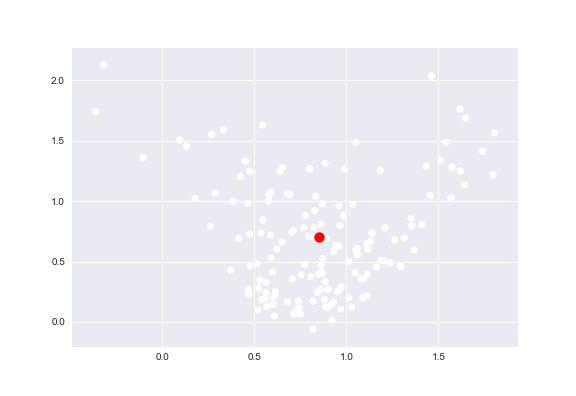
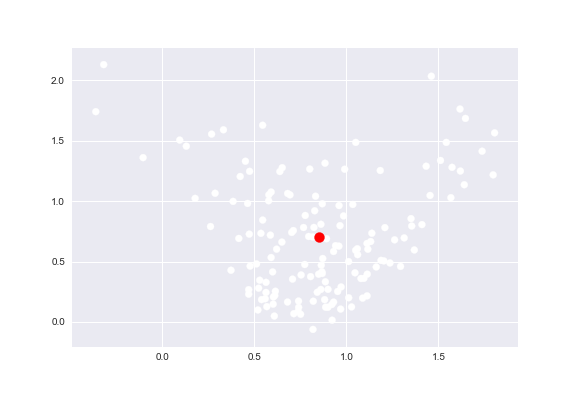
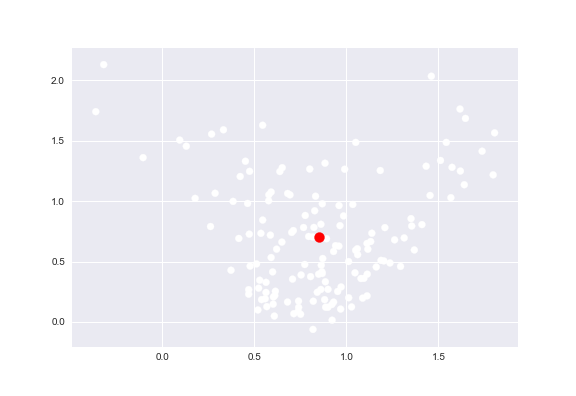
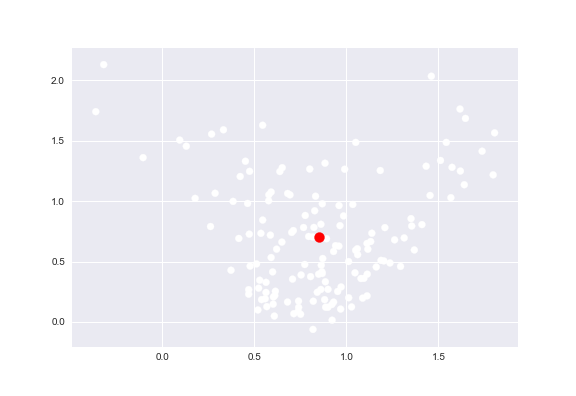
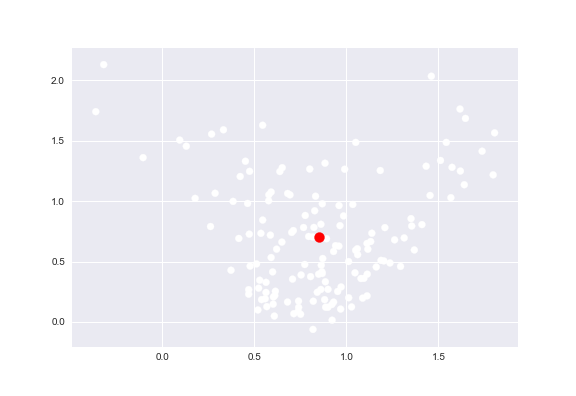
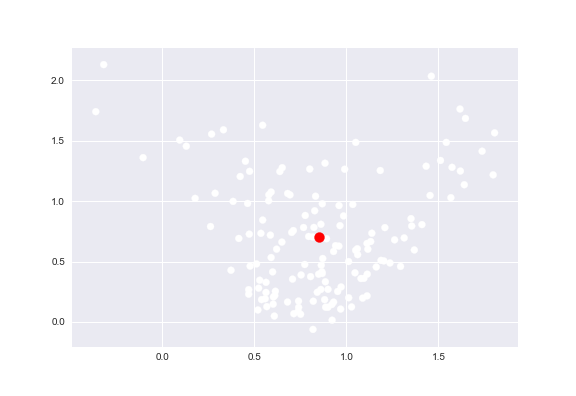
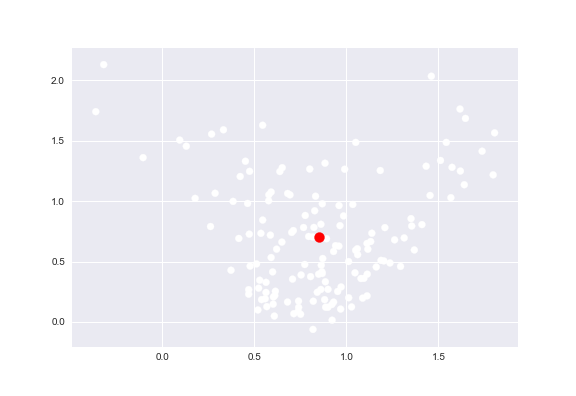
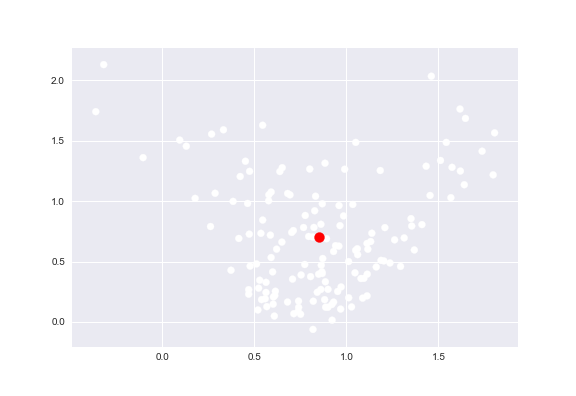
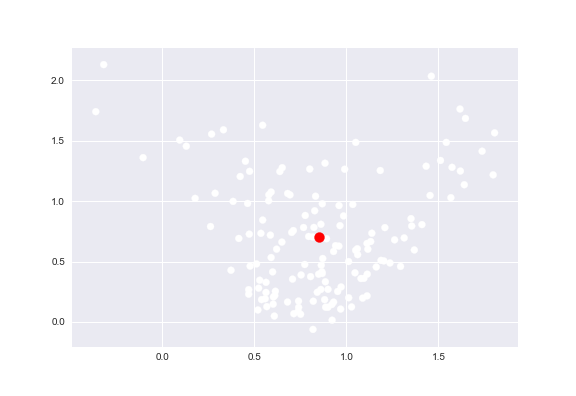
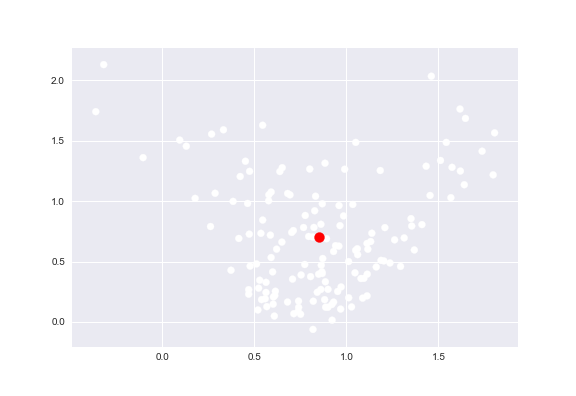
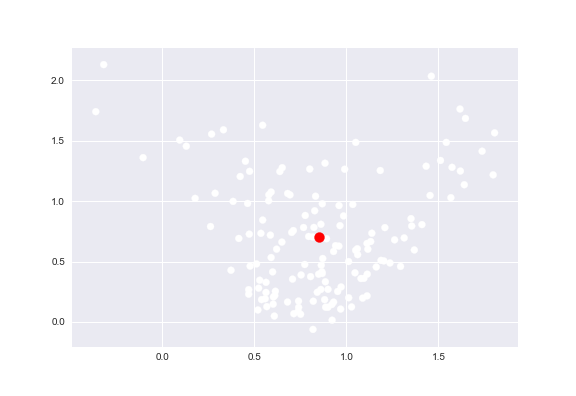
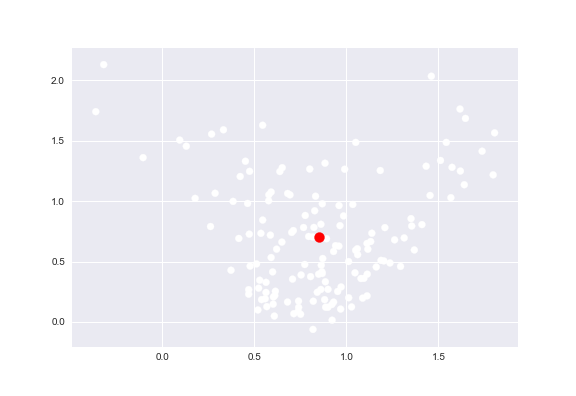

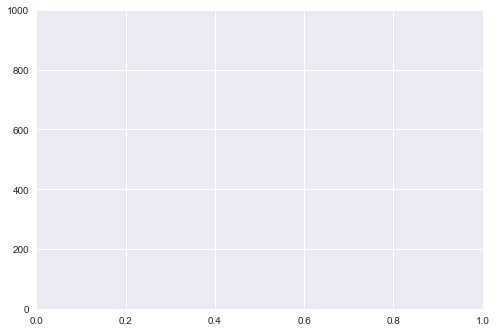

In [204]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 6)

line, = ax.plot([], [], lw=2)
init_points()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c = closest)
    centroids = move_centroids(closest, centroids)
    
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=1, blit=True)